In [ ]:
# Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.backend import clear_session
from statsmodels.tsa.statespace.varmax import VARMAX

In [ ]:
data = yf.download('GOOG')
data = data.drop(['Volume', 'Adj Close'], axis=1)
data = data.dropna()

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]

test_data = data_scaled[train_size:]


[*********************100%%**********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close
Date,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133
2004-08-20,2.515820,2.716817,2.503118,2.697639
2004-08-23,2.758411,2.826406,2.716070,2.724787
2004-08-24,2.770615,2.779581,2.579581,2.611960
2004-08-25,2.614201,2.689918,2.587302,2.640104
...,...,...,...,...
2023-12-29,140.679993,141.434998,139.899994,140.929993
2024-01-02,139.600006,140.615005,137.740005,139.559998
2024-01-03,138.600006,141.089996,138.429993,140.360001


In [ ]:
train_data.shape

(3903, 4)

In [ ]:
test_data.shape

(976, 4)

In [ ]:
train_data

array([[1.35039967e-04, 3.86337048e-04, 0.00000000e+00, 5.54601395e-05],
       [3.03428180e-04, 1.22230207e-03, 7.66629985e-04, 1.39474256e-03],
       [1.92727198e-03, 1.95501604e-03, 2.21039658e-03, 1.57790515e-03],
       ...,
       [4.90515002e-01, 4.95082393e-01, 4.96547275e-01, 4.95840868e-01],
       [4.93885319e-01, 4.95241544e-01, 4.99533756e-01, 4.98209037e-01],
       [4.92857805e-01, 4.94417168e-01, 4.94591323e-01, 4.95328134e-01]])

In [ ]:
train_data[:, 1]

array([3.86337048e-04, 1.22230207e-03, 1.95501604e-03, ...,
       4.95082393e-01, 4.95241544e-01, 4.94417168e-01])

[*********************100%%**********************]  1 of 1 completed
Epoch 1/100
122/122 [==============================] - 5s 11ms/step - loss: 0.0030
Epoch 2/100
122/122 [==============================] - 2s 15ms/step - loss: 2.4671e-04
Epoch 3/100
122/122 [==============================] - 2s 15ms/step - loss: 2.1176e-04
Epoch 4/100
122/122 [==============================] - 3s 21ms/step - loss: 1.6311e-04
Epoch 5/100
122/122 [==============================] - 2s 20ms/step - loss: 1.6396e-04
Epoch 6/100
122/122 [==============================] - 2s 16ms/step - loss: 1.6648e-04
Epoch 7/100
122/122 [==============================] - 1s 8ms/step - loss: 1.5238e-04
Epoch 8/100
122/122 [==============================] - 1s 8ms/step - loss: 1.4335e-04
Epoch 9/100
122/122 [==============================] - 1s 8ms/step - loss: 1.3332e-04
Epoch 10/100
122/122 [==============================] - 1s 8ms/step - loss: 1.2506e-04
Epoch 11/100
122/122 [==============================] - 1s 8ms/step 

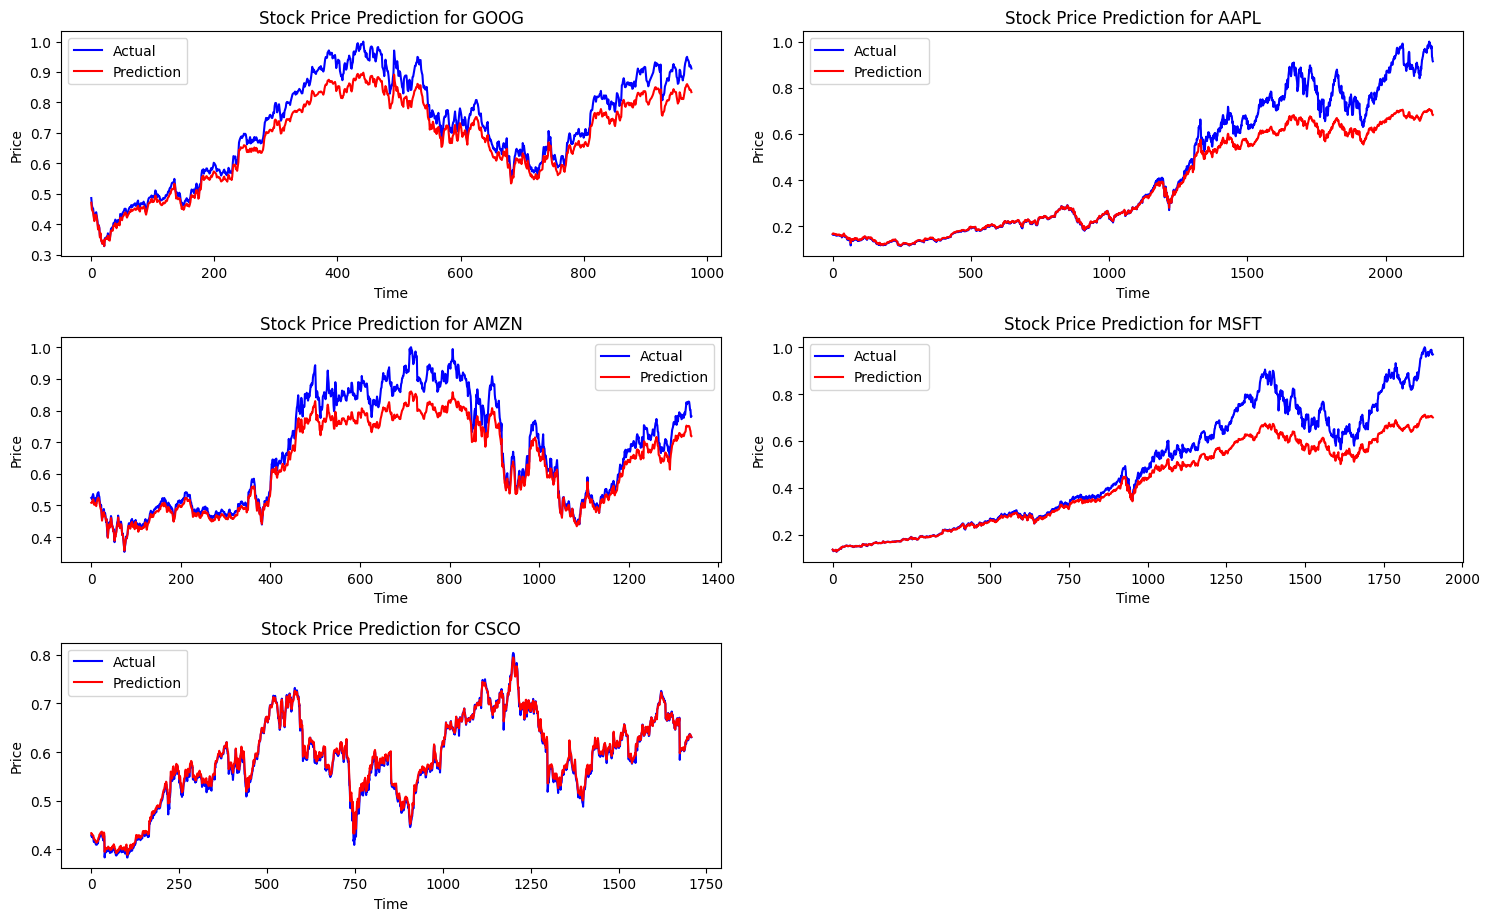

In [ ]:
# List of company tickers
tickers = ['GOOG', 'AAPL', 'AMZN', 'MSFT','CSCO']

# Initialize a figure for plotting
plt.figure(figsize=(15, 15))

for i, ticker in enumerate(tickers):
    # Get the stock data
    data = yf.download(ticker)

    # Clean the data
    data = data.drop(['Volume', 'Adj Close'], axis=1)
    data = data.dropna()

    # Scale the data
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)

    # Split the data into training and testing sets
    train_size = int(len(data_scaled) * 0.8)
    train_data = data_scaled[:train_size]
    test_data = data_scaled[train_size:]

    clear_session()

    # Create the LSTM model
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(train_data.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=64))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(train_data, train_data[:, 2], epochs=100)  # Reduced epochs for faster execution

    # Evaluate the model
    model.evaluate(test_data, test_data[:, 2])

    # Make predictions
    predictions = model.predict(test_data)

    # Plot the predictions
    plt.subplot(5, 2, i + 1)
    plt.plot(test_data[:, 2], color='blue', label='Actual')
    plt.plot(predictions, color='red', label='Prediction')
    plt.title(f'Stock Price Prediction for {ticker}')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()

plt.tight_layout()
plt.show()

[*********************100%%**********************]  1 of 1 completed
Epoch 1/100
157/157 [==============================] - 5s 7ms/step - loss: 1.0732e-04
Epoch 2/100
157/157 [==============================] - 1s 7ms/step - loss: 1.0920e-05
Epoch 3/100
157/157 [==============================] - 1s 7ms/step - loss: 8.6406e-06
Epoch 4/100
157/157 [==============================] - 1s 7ms/step - loss: 8.6783e-06
Epoch 5/100
157/157 [==============================] - 1s 8ms/step - loss: 7.6921e-06
Epoch 6/100
157/157 [==============================] - 2s 10ms/step - loss: 8.4647e-06
Epoch 7/100
157/157 [==============================] - 1s 9ms/step - loss: 8.7479e-06
Epoch 8/100
157/157 [==============================] - 1s 6ms/step - loss: 7.0122e-06
Epoch 9/100
157/157 [==============================] - 1s 6ms/step - loss: 7.6086e-06
Epoch 10/100
157/157 [==============================] - 1s 6ms/step - loss: 7.4524e-06
Epoch 11/100
157/157 [==============================] - 1s 6ms/step -

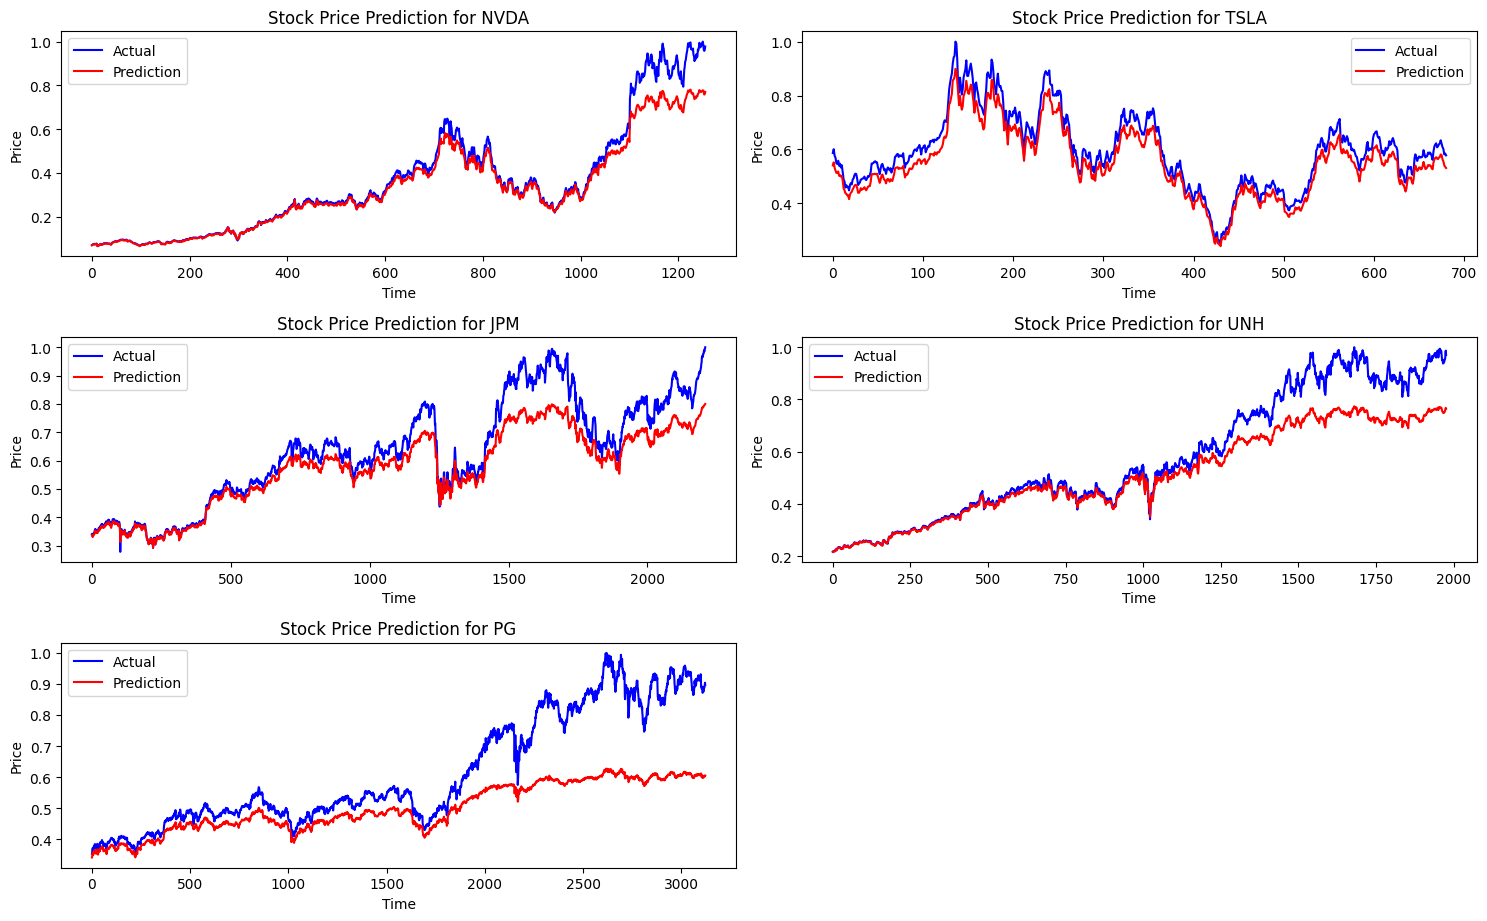

In [ ]:
# List of company tickers
tickers = ['NVDA', 'TSLA', 'JPM', 'UNH', 'PG']

# Initialize a figure for plotting
plt.figure(figsize=(15, 15))

for i, ticker in enumerate(tickers):
    # Get the stock data
    data = yf.download(ticker)

    # Clean the data
    data = data.drop(['Volume', 'Adj Close'], axis=1)
    data = data.dropna()

    # Scale the data
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)

    # Split the data into training and testing sets
    train_size = int(len(data_scaled) * 0.8)
    train_data = data_scaled[:train_size]
    test_data = data_scaled[train_size:]

    clear_session()

    # Create the LSTM model
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(train_data.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=64))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(train_data, train_data[:, 2], epochs=100)  # Reduced epochs for faster execution

    # Evaluate the model
    model.evaluate(test_data, test_data[:, 2])

    # Make predictions
    predictions = model.predict(test_data)

    # Plot the predictions
    plt.subplot(5, 2, i + 1)
    plt.plot(test_data[:, 2], color='blue', label='Actual')
    plt.plot(predictions, color='red', label='Prediction')
    plt.title(f'Stock Price Prediction for {ticker}')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# List of 10 companies' ticker symbols
tickers = ['GOOG', 'AAPL', 'AMZN', 'MSFT', 'CSCO', 'NVDA', 'TSLA', 'JPM', 'UNH', 'PG']

# Initialize a list to hold the data
all_stock_data = []

# Download and label data for each ticker
for ticker in tickers:
    data = yf.download(ticker)
    data['Ticker'] = ticker  # Add a new column with the ticker as the label
    all_stock_data.append(data)  # Append the labeled data to the list

# Combine all individual DataFrames into one large DataFrame
stock_data = pd.concat(all_stock_data)
stock_data

Processing GOOG
[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
121/121 [==============================] - 25s 50ms/step - loss: 0.0012
Epoch 2/50
121/121 [==============================] - 6s 53ms/step - loss: 5.3087e-05
Epoch 3/50
121/121 [==============================] - 7s 54ms/step - loss: 5.2791e-05
Epoch 4/50
121/121 [==============================] - 6s 48ms/step - loss: 5.0748e-05
Epoch 5/50
121/121 [==============================] - 7s 58ms/step - loss: 5.2590e-05
Epoch 6/50
121/121 [==============================] - 6s 47ms/step - loss: 5.6106e-05
Epoch 7/50
121/121 [==============================] - 7s 59ms/step - loss: 4.9365e-05
Epoch 8/50
121/121 [==============================] - 6s 47ms/step - loss: 4.7053e-05
Epoch 9/50
121/121 [==============================] - 7s 59ms/step - loss: 4.8219e-05
Epoch 10/50
121/121 [==============================] - 6s 47ms/step - loss: 4.8867e-05
Epoch 11/50
121/121 [==============================] - 7s

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


31/31 [==============================] - 1s 15ms/step


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


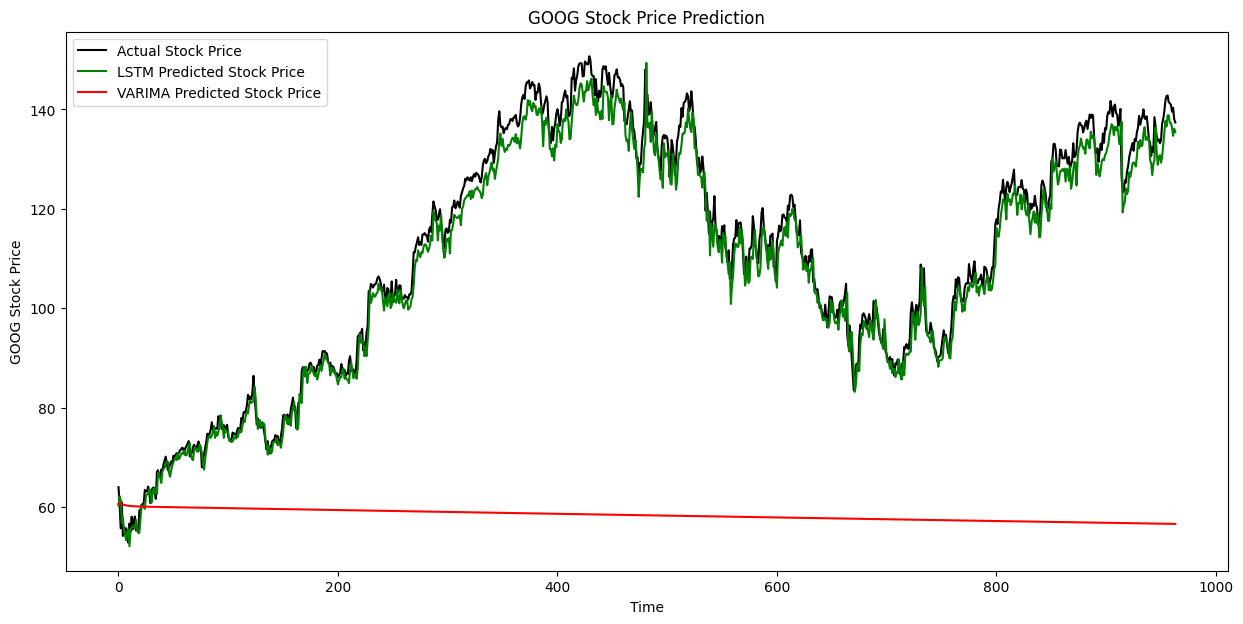

In [ ]:
# Define symbols
symbols = ['GOOG'] #, 'AAPL', 'AMZN', 'MSFT', 'CSCO', 'NVDA', 'TSLA', 'JPM', 'UNH', 'PG'

# Function to create sequences for LSTM
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:(i + sequence_length), :-1]  # Open, High, Low prices
        y = data[i + sequence_length, -1]  # Close price
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

for symbol in symbols:
    print(f"Processing {symbol}")

    # Fetch the data
    data = yf.download(symbol)
    stock_data = data[['Open', 'High', 'Low', 'Close']]

    # Preprocess the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_data)

    sequence_length = 60  # Number of days to look back
    x, y = create_sequences(scaled_data, sequence_length)

    # Split the data into training and testing sets
    train_size = int(len(x) * 0.8)
    x_train, x_test = x[:train_size], x[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Clear previous LSTM session
    clear_session()

    # Build and Train the LSTM Model
    model_lstm = Sequential()
    model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 3)))
    model_lstm.add(LSTM(units=50))
    model_lstm.add(Dense(1))
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')
    model_lstm.fit(x_train, y_train, epochs=50)

    # Re-instantiate VARMAX model to ensure it's fresh
    model_varima = VARMAX(stock_data.iloc[:-len(x_test)], order=(3,1))
    results_varima = model_varima.fit(disp=False)

    # Predict with LSTM
    lstm_predicted = model_lstm.predict(x_test)
    lstm_predicted = scaler.inverse_transform(np.concatenate((lstm_predicted, np.zeros((len(lstm_predicted), 3))), axis=1))[:,0]

    # Predict with VARIMA
    varima_forecast = results_varima.get_forecast(steps=len(x_test))
    varima_predicted = varima_forecast.predicted_mean['Close'].values

    # Retrieve Actual Prices
    actual_prices = stock_data['Close'][-len(x_test):].values

    # Plotting the results
    plt.figure(figsize=(15,7))
    plt.plot(actual_prices, color='black', label='Actual Stock Price')
    plt.plot(lstm_predicted, color='green', label='LSTM Predicted Stock Price')
    plt.plot(varima_predicted, color='red', label='VARIMA Predicted Stock Price')
    plt.title(f'{symbol} Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel(f'{symbol} Stock Price')
    plt.legend()
    plt.show()


[*********************100%%**********************]  10 of 10 completed
Epoch 1/100
86/86 [==============================] - 4s 12ms/step - loss: 0.0115
Epoch 2/100
86/86 [==============================] - 1s 12ms/step - loss: 0.0030
Epoch 3/100
86/86 [==============================] - 1s 10ms/step - loss: 0.0030
Epoch 4/100
86/86 [==============================] - 1s 10ms/step - loss: 0.0035
Epoch 5/100
86/86 [==============================] - 1s 10ms/step - loss: 0.0027
Epoch 6/100
86/86 [==============================] - 1s 9ms/step - loss: 0.0026
Epoch 7/100
86/86 [==============================] - 1s 9ms/step - loss: 0.0030
Epoch 8/100
86/86 [==============================] - 1s 9ms/step - loss: 0.0026
Epoch 9/100
86/86 [==============================] - 1s 10ms/step - loss: 0.0025
Epoch 10/100
86/86 [==============================] - 1s 9ms/step - loss: 0.0024
Epoch 11/100
86/86 [==============================] - 1s 9ms/step - loss: 0.0025
Epoch 12/100
86/86 [=====================

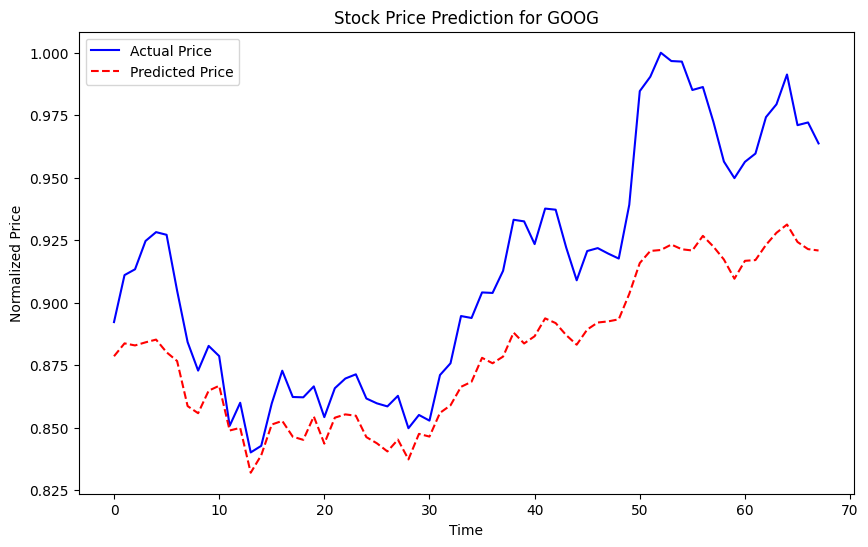

<Figure size 640x480 with 0 Axes>

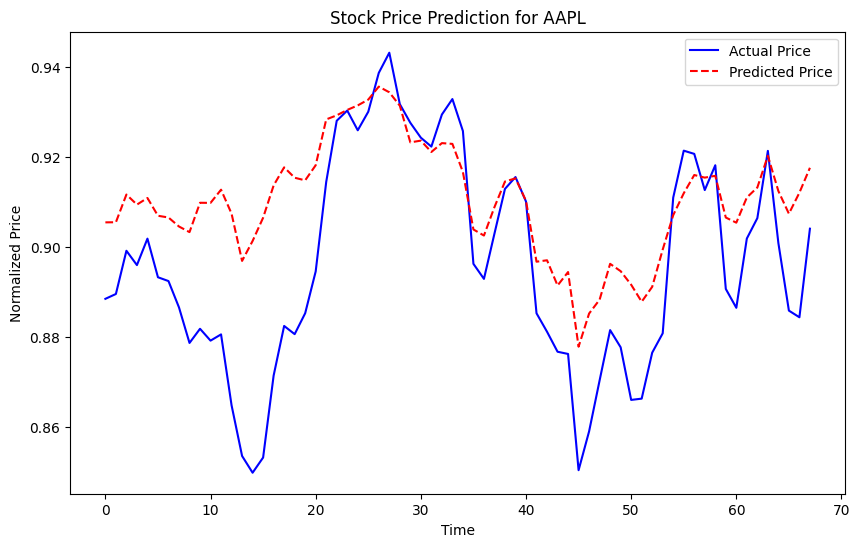

<Figure size 640x480 with 0 Axes>

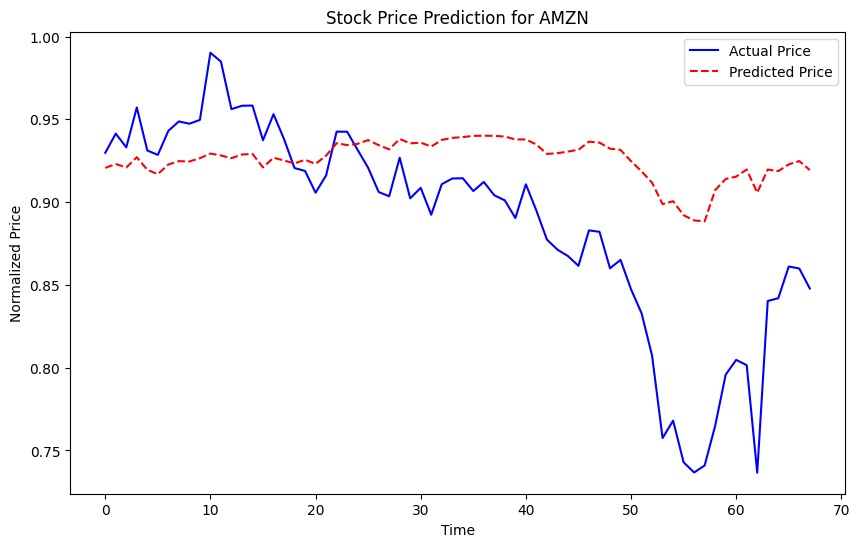

<Figure size 640x480 with 0 Axes>

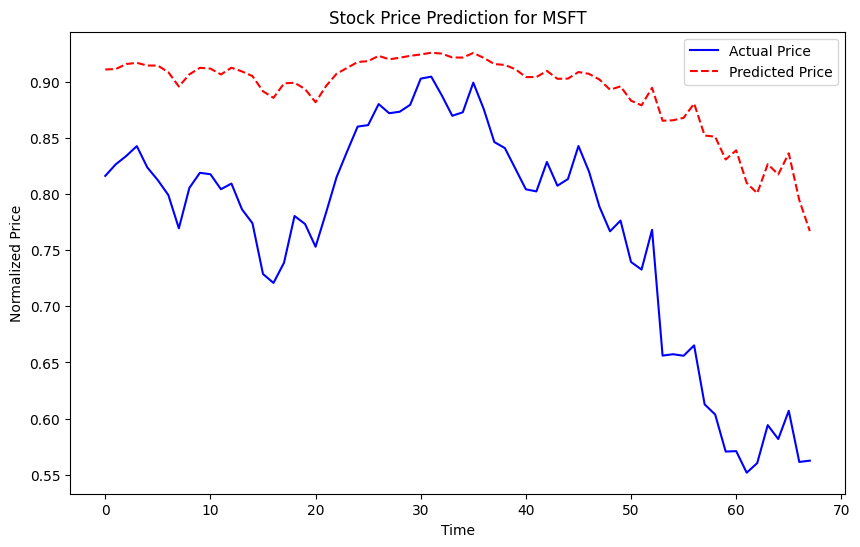

<Figure size 640x480 with 0 Axes>

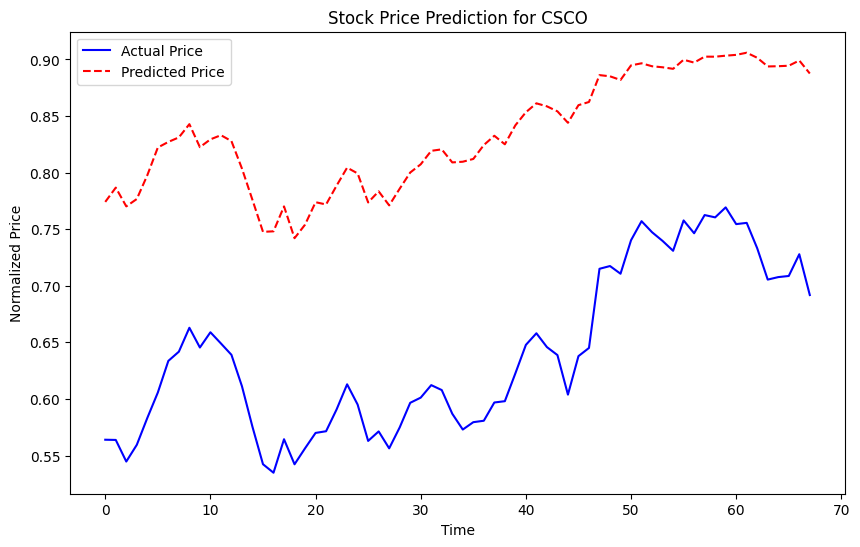

<Figure size 640x480 with 0 Axes>

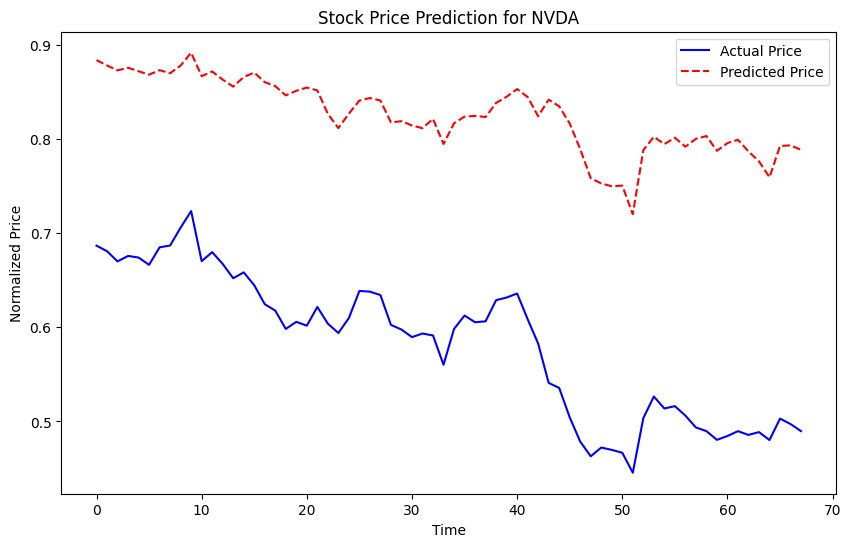

<Figure size 640x480 with 0 Axes>

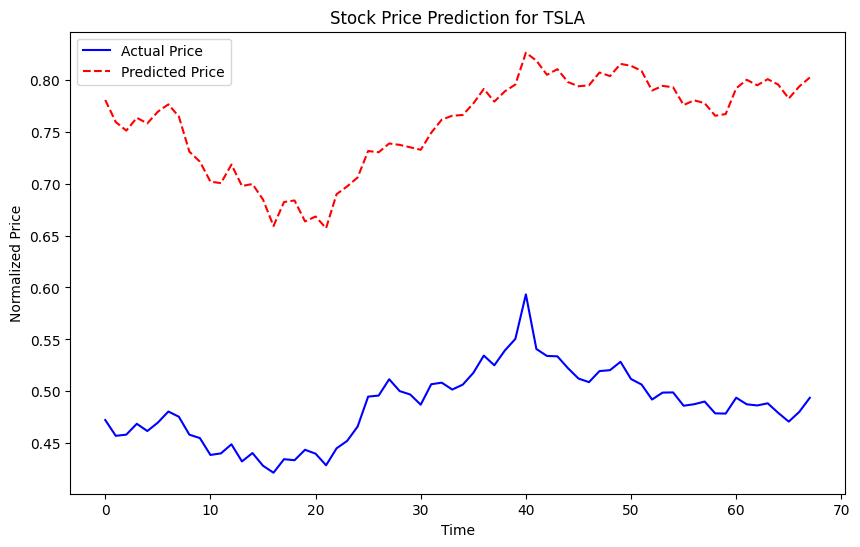

<Figure size 640x480 with 0 Axes>

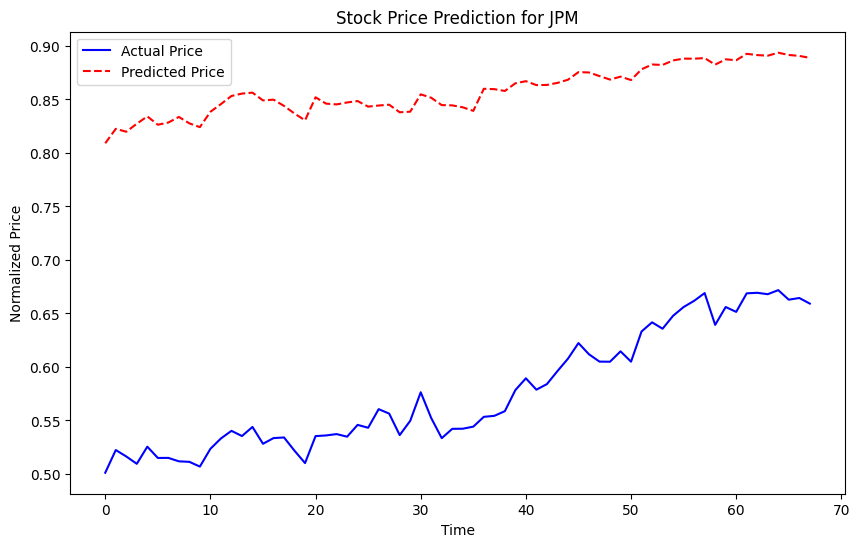

<Figure size 640x480 with 0 Axes>

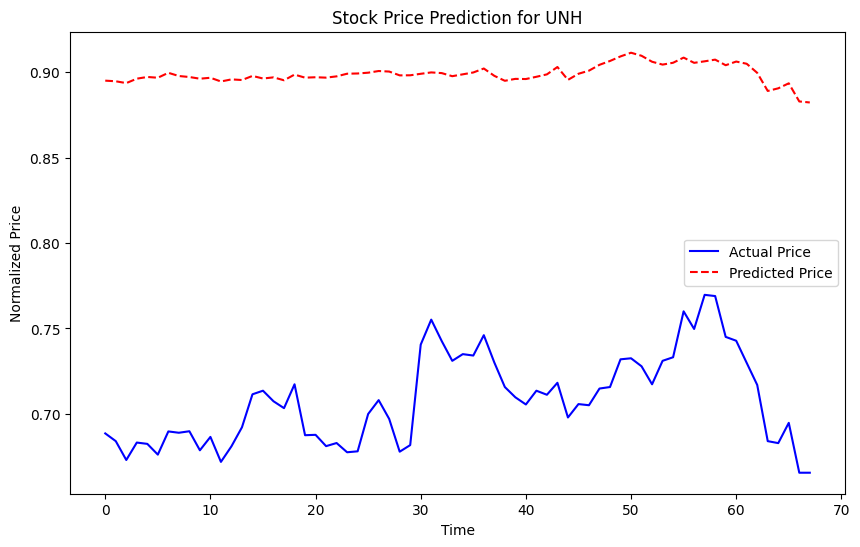

<Figure size 640x480 with 0 Axes>

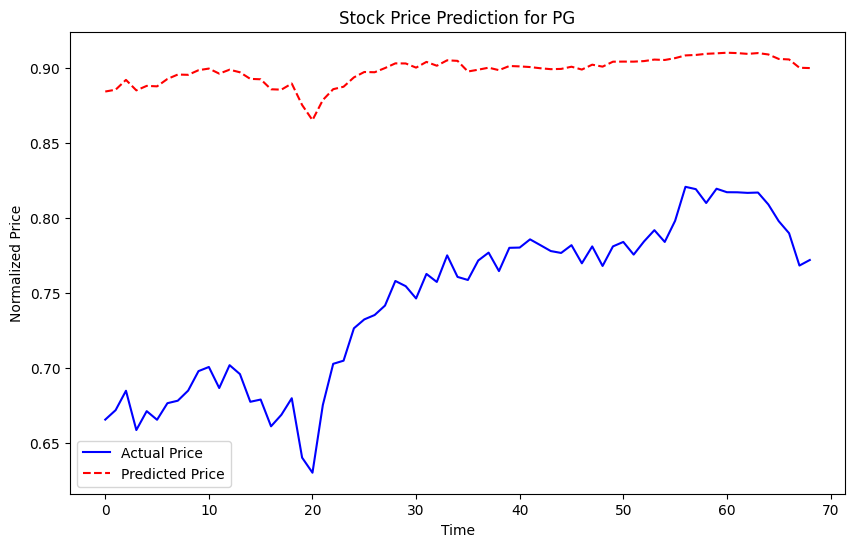

<Figure size 640x480 with 0 Axes>

In [ ]:
# Get the stock data
tickers = ['GOOG', 'AAPL', 'AMZN', 'MSFT', 'CSCO', 'NVDA', 'TSLA', 'JPM', 'UNH', 'PG']
data = yf.download(tickers)

# Clean the data
data = data['Close'].dropna()

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

clear_session()
# Create the LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(train_data.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_data, train_data[:, 1], epochs=100)

# Evaluate the model
model.evaluate(test_data, test_data[:, 1])

# Make predictions
predictions = model.predict(test_data)

# Enable interactive mode
plt.ion()

# Plot the predictions
for i, ticker in enumerate(tickers):
    # Correct indexing for each company in the test data and predictions
    company_test_data = test_data[i * len(test_data) // len(tickers):(i + 1) * len(test_data) // len(tickers)]
    company_predictions = predictions[i * len(predictions) // len(tickers):(i + 1) * len(predictions) // len(tickers)]

    plt.figure(figsize=(10, 6))
    plt.plot(company_test_data[:, 1], color='blue', label='Actual Price')
    plt.plot(company_predictions, color='red', linestyle='--', label='Predicted Price')
    plt.title(f'Stock Price Prediction for {ticker}')
    plt.xlabel('Time')
    plt.ylabel('Normalized Price')
    plt.legend()
    plt.draw()
    plt.pause(0.001)
    plt.clf()  # Clear the figure to make ready for the next plot

plt.ioff()  # Disable interactive mode
plt.show()  # Show the final plot
